# 07.1 정규표현식과 텍스트 데이터 전처리

7.1.1 정규표현식 소개

7.1.2 정규표현식을 이용한 텍스트 데이터 전처리

In [1]:
import re
text = '홍길동 전화번호는 Kt 1234-5678번 입니까?'
f = re.compile('[가-힣]').findall(text)
f

['홍', '길', '동', '전', '화', '번', '호', '는', '번', '입', '니', '까']

In [2]:
join =" ".join(f)
comma = ",".join(f)
print(join, comma)
re.compile('\w+').findall(text)

홍 길 동 전 화 번 호 는 번 입 니 까 홍,길,동,전,화,번,호,는,번,입,니,까


['홍길동', '전화번호는', 'Kt', '1234', '5678번', '입니까']

In [3]:
print(re.compile('\d').sub(' ',text))
print(re.compile('[^가-힣+ ]').sub(' ',text))

홍길동 전화번호는 Kt     -    번 입니까?
홍길동 전화번호는             번 입니까 


# 07.2 한글 맞춤법과 반복되는 신조어 처리

In [4]:
# !pip install git+https://github.com/ssut/py-hanspell
# !pip install git+https://github.com/haven-jeon/PyKoSpacing.git

참조 : https://github.com/ssut/py-hanspell

참조 : https://github.com/haven-jeon/PyKoSpacing

In [5]:
# from hanspell import spell_checker
# print(spell_checker.check("아버지가방에들어가신다"))

In [6]:
!pip install soynlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 5.3 MB/s eta 0:00:00


In [7]:
from soynlp.normalizer import emoticon_normalize, repeat_normalize
print(emoticon_normalize('앜ㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠㅠ', num_repeats=2))

아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ


In [8]:
print(repeat_normalize('와하하하하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하핫', num_repeats=2))

와하하핫
와하하핫
와하하핫


# 07.3 단어 또는 형태소 단위 토큰화

In [9]:
# 문자단위 토큰화
para = "나는 학교에 다니는 학생 입니다\n나는 좋은 선생님 입니다\n당신은 매우 좋은 선생님 입니다"
print(list(para))

['나', '는', ' ', '학', '교', '에', ' ', '다', '니', '는', ' ', '학', '생', ' ', '입', '니', '다', '\n', '나', '는', ' ', '좋', '은', ' ', '선', '생', '님', ' ', '입', '니', '다', '\n', '당', '신', '은', ' ', '매', '우', ' ', '좋', '은', ' ', '선', '생', '님', ' ', '입', '니', '다']


In [10]:
# 띄어쓰기 단위 토큰화
print(para.split())

['나는', '학교에', '다니는', '학생', '입니다', '나는', '좋은', '선생님', '입니다', '당신은', '매우', '좋은', '선생님', '입니다']


In [11]:
# 영문 단어단위 토큰화 방법
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
# 영문의 기반 단어단위 토큰화
eng ='''Good muffins cost $3.88\nin New York.  Please buy me
... two of them.\n\nThanks.
Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop.
'''
print(word_tokenize(eng))

['Good', 'muffins', 'cost', '$', '3.88', 'in', 'New', 'York', '.', 'Please', 'buy', 'me', '...', 'two', 'of', 'them', '.', 'Thanks', '.', 'Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [13]:
#
print(WordPunctTokenizer().tokenize(eng))
print(text_to_word_sequence(eng))

['Good', 'muffins', 'cost', '$', '3', '.', '88', 'in', 'New', 'York', '.', 'Please', 'buy', 'me', '...', 'two', 'of', 'them', '.', 'Thanks', '.', 'Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']
['good', 'muffins', 'cost', '3', '88', 'in', 'new', 'york', 'please', 'buy', 'me', 'two', 'of', 'them', 'thanks', "don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


# 07.4 한글 형태소 분석기를 이용한 토큰화와 빈도분석 사례

In [14]:
# 폰트 설치
import matplotlib as mpl
import matplotlib.pyplot as plt
!wget https://github.com/byungjooyoo/Dataset/raw/main/NanumGothic.ttf
mpl.font_manager.fontManager.addfont('NanumGothic.ttf')
mpl.rc('font', family='NanumGothic')
plt.rc("axes", unicode_minus=False)

--2024-04-19 18:51:21--  https://github.com/byungjooyoo/Dataset/raw/main/NanumGothic.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/byungjooyoo/Dataset/main/NanumGothic.ttf [following]
--2024-04-19 18:51:21--  https://raw.githubusercontent.com/byungjooyoo/Dataset/main/NanumGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4343844 (4.1M) [application/octet-stream]
Saving to: ‘NanumGothic.ttf’

NanumGothic.ttf     100%[===================>]   4.14M  --.-KB/s    in 0.1s    

2024-04-19 18:51:22 (38.6 MB/s) - ‘NanumGothic.ttf’ saved [4343844/4343844]



<Axes: title={'center': '한글'}>

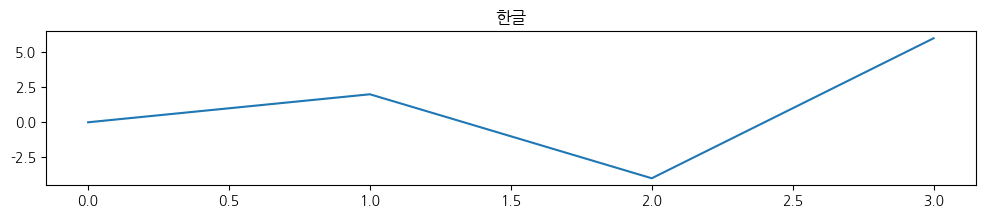

In [15]:
#폰트설치 결과 확인
import pandas as pd
pd.Series([0,2,-4,6]).plot(title="한글", figsize=(12, 2))

In [16]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 31.0 MB/s eta 0:00:00


In [17]:
#대통령 연설문 다운로드
!wget https://raw.githubusercontent.com/byungjooyoo/Dataset/main/president_message.txt
para = open('president_message.txt', 'r').read()
print(para[:100])

--2024-04-19 18:51:40--  https://raw.githubusercontent.com/byungjooyoo/Dataset/main/president_message.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8497 (8.3K) [text/plain]
Saving to: ‘president_message.txt’

president_message.t 100%[===================>]   8.30K  --.-KB/s    in 0s      

2024-04-19 18:51:40 (57.9 MB/s) - ‘president_message.txt’ saved [8497/8497]

존경하고 사랑하는 국민 여러분, 750만 재외동포 여러분 그리고 자유를 사랑하는 세계 시민 여러분, 저는 이 나라를 자유민주주의와 시장경제 체제를 기반으로 국민이 진정한 주인인 나


In [18]:
from konlpy.tag import Komoran
from collections import Counter
tagger = Komoran()
nouns = tagger.nouns(para)
nouns = [n for n in nouns if len(n) > 1]
count = Counter(nouns)
top = count.most_common(20)
print(top)

[('자유', 32), ('국민', 15), ('시민', 15), ('세계', 13), ('여러분', 12), ('평화', 12), ('사회', 11), ('나라', 9), ('국제', 9), ('해결', 9), ('위기', 8), ('존경', 7), ('문제', 7), ('가치', 7), ('연대', 6), ('감사', 5), ('국가', 5), ('우리나라', 5), ('성장', 5), ('민주주의', 5)]


In [19]:
nouns = para.split()
nouns = [n for n in nouns if len(n) > 1]
count = Counter(nouns)
top = count.most_common(20)
print(top)

[('그리고', 11), ('국민', 10), ('여러분,', 10), ('세계', 10), ('합니다.', 10), ('있습니다.', 9), ('자유', 8), ('것입니다.', 7), ('자유와', 7), ('저는', 6), ('아니라', 6), ('시민', 5), ('존경하는', 5), ('가치를', 5), ('시민이', 5), ('역할을', 4), ('하는', 4), ('대통령,', 4), ('지금', 4), ('있는', 4)]


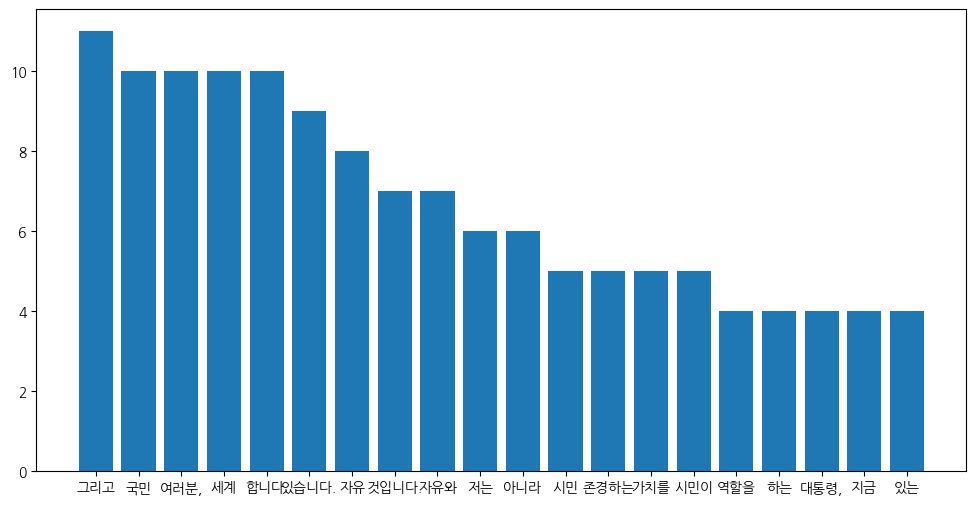

In [20]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font', family='NanumGothic')
x = np.arange(len(top))
keys = [x[0] for x in top]
values = [x[1] for x in top]
plt.figure(figsize=(12,6))
plt.bar(x, values)
plt.xticks(x, keys)
plt.show()

In [21]:
print(para)

존경하고 사랑하는 국민 여러분, 750만 재외동포 여러분 그리고 자유를 사랑하는 세계 시민 여러분, 저는 이 나라를 자유민주주의와 시장경제 체제를 기반으로 국민이 진정한 주인인 나라로 재건하고, 국제사회에서 책임과 역할을 다하는 나라로 만들어야 하는 시대적 소명을 갖고 오늘 이 자리에 섰습니다.

역사적인 자리에 함께 해주신 국민 여러분께 감사드립니다. 문재인, 박근혜 전 대통령, 그리고 할리마 야콥 싱가포르 대통령, 포스탱 아르샹쥬 투아데라 중앙아프리카공화국 대통령, 왕치산 중국 국가부주석, 메가와티 수카르노푸트리 인도네시아 전 대통령, 더글러스 엠호프 해리스 미국 부통령 부군, 조지 퓨리 캐나다 상원의장, 하야시 요시마사 일본 외무상을 비롯한 세계 각국의 경축 사절과 내외 귀빈 여러분께도 깊이 감사드립니다. 이 자리를 빌려 지난 2년간 코로나 펜데믹을 극복하는 과정에서 큰 고통을 감내해주신 국민 여러분께 경의를 표합니다. 그리고 헌신해주신 의료진 여러분께도 감사드립니다.

존경하는 국민 여러분, 세계 시민 여러분, 지금 전 세계는 팬데믹 위기, 교역 질서의 변화와 공급망의 재편, 기후 변화, 식량과 에너지 위기, 분쟁의 평화적 해결의 후퇴 등 어느 한 나라가 독자적으로, 또는 몇몇 나라만 참여해서 해결하기 어려운 난제들에 직면해 있습니다. 다양한 위기가 복합적으로 인류 사회에 어두운 그림자를 드리우고 있는 것입니다. 또한 우리나라를 비롯한 많은 나라들이 국내적으로 초저성장과 대규모 실업, 양극화의 심화와 다양한 사회적 갈등으로 인해 공동체의 결속력이 흔들리고 와해되고 있습니다.

한편, 이러한 문제들을 해결해야 하는 정치는 이른바 민주주의의 위기로 인해 제 기능을 하지 못하고 있습니다. 가장 큰 원인으로 지목되는 것이 바로 반지성주의입니다. 견해가 다른 사람들이 서로의 입장을 조정하고 타협하기 위해서는 과학과 진실이 전제되어야 합니다. 그것이 민주주의를 지탱하는 합리주의와 지성주의입니다. 국가 간, 국가 내부의 지나친 집단적 갈등에 의해 진실이 왜곡되고, 